In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('ames_housing_data.xlsx')


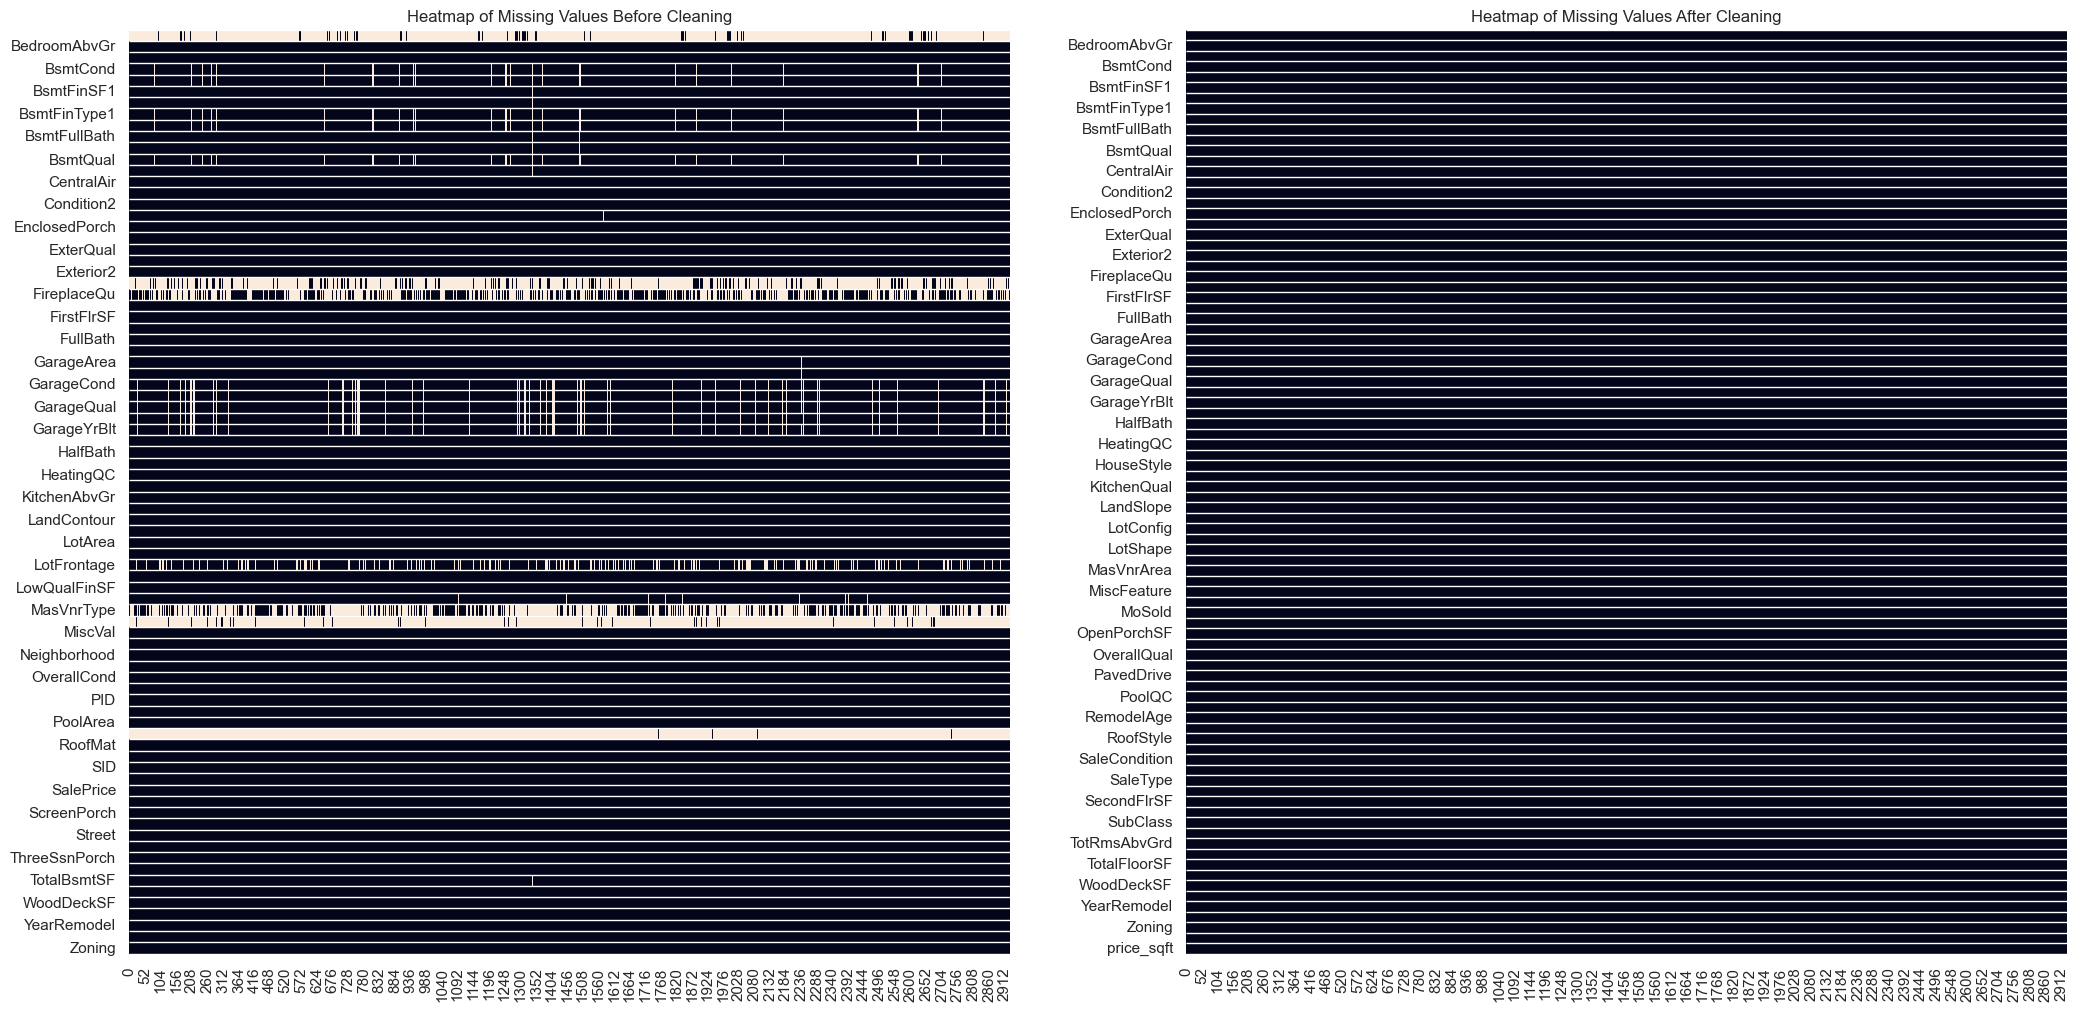

In [3]:
### Adding in code to clean the data.
import seaborn as sns
import matplotlib.pyplot as plt


## 
sns.set()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25, 12))

df_heat1=df.sort_index(axis=1, ascending=False)
sns.heatmap(df_heat1.T.isnull(), ax=ax1, cbar=False).invert_yaxis()
ax1.hlines(range(len(df_heat1)), *ax1.get_xlim(), color='white', linewidths=1)
ax1.vlines([], [], [])
ax1.set_title('Heatmap of Missing Values Before Cleaning')
plt.yticks(rotation = 360)
df['TotalFloorSF'] = df['FirstFlrSF'] + df['SecondFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['QualityIndex'] = df['OverallQual'] * df['OverallCond']
df['logSalePrice'] = np.log(df['SalePrice'])
df['price_sqft'] = df['SalePrice'] / df['TotalFloorSF']
Nulls=[]
for i in df.columns:
    if df[i].isnull().sum() > 0:
        Nulls.append(i)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())           
df['Alley']=df['Alley'].fillna('No alley')
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['RemodelAge']=df['YrSold']-df['YearRemodel']
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col].fillna('No basement')
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    if df[col].dtype == 'object':
        df[col]=df[col].fillna('No garage')
    else:
        df[col]=df[col].fillna('None')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageCars']=df['GarageCars'].fillna(0)
df['GarageArea']=df['GarageArea'].fillna(0)
df['PoolQC']=df['PoolQC'].fillna('No pool')
df['Fence']=df['Fence'].fillna('No fence')
df['MiscFeature']=df['MiscFeature'].fillna('No feature')
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna('No fireplace')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('No basement')
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col]=df[col].fillna(0)
df.to_csv('ames_housing_data.csv', index=False)
sns.set()
df_heat2=df.sort_index(axis=1, ascending=False)
sns.heatmap(df_heat2.T.isnull(), ax=ax2, cbar=False).invert_yaxis()
ax2.hlines(range(len(df_heat2)), *ax2.get_xlim(), color='white', linewidths=1)
ax2.set_title('Heatmap of Missing Values After Cleaning')
ax2.vlines([], [], [])
plt.yticks(rotation = 360)
plt.show()

In [5]:
ames_housing_data=df.copy()

# Task 1

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets (70/30 split)
train_data, test_data = train_test_split(ames_housing_data, test_size=0.3, random_state=42)

# Creating a table of observation counts for the train/test data partition
observation_counts = {
    "Dataset": ["Train", "Test"],
    "Observation Counts": [len(train_data), len(test_data)]
}

observation_counts_df = pd.DataFrame(observation_counts)
observation_counts_df

,Dataset,Observation Counts
0,Train,2051
1,Test,879


In [9]:
continuous_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodel', 
                   'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'GrLivArea']

categorical_vars = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'HouseStyle']

available_categorical_vars = [var for var in categorical_vars if var in train_data.columns]

dummy_vars = pd.get_dummies(train_data[available_categorical_vars], drop_first=True)

predictor_pool = pd.concat([train_data[continuous_vars], dummy_vars], axis=1)

predictor_list = predictor_pool.columns.tolist()
predictor_list

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodel',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'FirstFlrSF',
 'SecondFlrSF',
 'GrLivArea',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

# Task 2

## VIF Calc
Several variables exhibit high VIF values, suggesting potential multicollinearity. It might be prudent to consider removing or adjusting some of these variables to address this issue.

Regarding VIF values for indicator (dummy) variables, they can sometimes be inflated, especially when categories of the original variable have a significant imbalance in counts. High VIFs for dummy variables, particularly when the original categorical variable has many levels, might not always indicate harmful multicollinearity. However, it's still essential to be cautious and understand the context of the data and the domain when interpreting these values.


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = predictor_pool.select_dtypes(include=[float, int]).columns
predictor_pool_filled = predictor_pool[numerical_cols].fillna(predictor_pool[numerical_cols].mean())

assert not predictor_pool_filled.isna().sum().sum(), "There are still missing values!"

vif_data = pd.DataFrame()
vif_data["Variable"] = predictor_pool_filled.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_pool_filled.values, i) 
                   for i in range(predictor_pool_filled.shape[1])]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted


,Variable,VIF
5,YearRemodel,10286.092790
4,YearBuilt,9835.516445
11,GrLivArea,1217.520955
9,FirstFlrSF,767.104595
10,SecondFlrSF,148.062712
8,TotalBsmtSF,67.003511
2,OverallQual,38.653702
3,OverallCond,36.339358
7,BsmtUnfSF,18.331332
6,BsmtFinSF1,15.794448


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Helper function to fit OLS model using different selection methods
def fit_ols_model(data, target, predictors, method):
    """Fits an OLS model using a specific selection method."""
    initial_formula = target + " ~ " + " + ".join(predictors)
    model = ols(initial_formula, data=data).fit()
    
    if method == "backward":
        while True:
            max_p_value = max(model.pvalues[1:])
            if max_p_value > 0.05:
                exclude_variable = model.pvalues.idxmax()
                predictors.remove(exclude_variable.split("[")[0].strip())
                formula = target + " ~ " + " + ".join(predictors)
                model = ols(formula, data=data).fit()
            else:
                break
    
    elif method == "forward":
        predictors = []
        remaining_predictors = initial_predictors.copy()
        while remaining_predictors:
            temp_predictors = predictors + [remaining_predictors[0]]
            temp_formula = target + " ~ " + " + ".join(temp_predictors)
            temp_model = ols(temp_formula, data=data).fit()
            if temp_model.pvalues[-1] < 0.05:
                predictors = temp_predictors
            remaining_predictors.remove(remaining_predictors[0])
        formula = target + " ~ " + " + ".join(predictors)
        model = ols(formula, data=data).fit()
    
    elif method == "stepwise":
        predictors = []
        remaining_predictors = initial_predictors.copy()
        while remaining_predictors:
            changed = False
            temp_predictors = predictors + [remaining_predictors[0]]
            temp_formula = target + " ~ " + " + ".join(temp_predictors)
            temp_model = ols(temp_formula, data=data).fit()
            if temp_model.pvalues[-1] < 0.05:
                predictors = temp_predictors
                changed = True
            remaining_predictors.remove(remaining_predictors[0])
            
            model = ols(target + " ~ " + " + ".join(predictors), data=data).fit()
            p_values = model.pvalues[1:]
            while max(p_values) > 0.05:
                changed = True
                remove = p_values.idxmax()
                predictors.remove(remove.split("[")[0].strip())
                model = ols(target + " ~ " + " + ".join(predictors), data=data).fit()
                p_values = model.pvalues[1:]
            
            if not changed:
                break
    
    return model
    
target = "SalePrice"

train_data_updated = train_data.copy()
train_data_updated[predictor_pool_filled.columns] = predictor_pool_filled

# Fitting models again using different selection methods on the updated train_data
models = {
    "Full Model": ols(target + " ~ " + " + ".join(initial_predictors), data=train_data_updated).fit(),
    "Backward Selection": fit_ols_model(train_data_updated, target, initial_predictors, method="backward"),
    "Forward Selection": fit_ols_model(train_data_updated, target, initial_predictors.copy(), method="forward"),
    "Stepwise Selection": fit_ols_model(train_data_updated, target, initial_predictors.copy(), method="stepwise")
}

# Extracting the selected predictors for each model
selected_predictors = {key: model.model.exog_names[1:] for key, model in models.items()}
selected_predictors

{'Full Model': ['LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodel',
  'BsmtFinSF1',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'FirstFlrSF',
  'SecondFlrSF',
  'GrLivArea'],
 'Backward Selection': ['LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodel',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'FirstFlrSF',
  'SecondFlrSF'],
 'Forward Selection': ['LotFrontage',
  'LotArea',
  'OverallQual',
  'YearBuilt',
  'YearRemodel',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'FirstFlrSF',
  'SecondFlrSF'],
 'Stepwise Selection': ['LotFrontage', 'LotArea', 'OverallQual']}

## VIF Calc for Each Model
The table below compares the in-sample fit and predictive accuracy metrics for the models.

In [16]:
# Calculating VIF values for each model's predictors
vif_values = {}
for key, model_predictors in selected_predictors.items():
    temp_data = train_data_updated[model_predictors]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = temp_data.columns
    vif_data["VIF"] = [variance_inflation_factor(temp_data.values, i) for i in range(temp_data.shape[1])]
    vif_values[key] = vif_data

# Calculate model metrics: adjusted R^2, AIC, BIC, mean squared error, and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_metrics = {}
for key, model in models.items():
    metrics = {}
    predictions = model.predict(train_data_updated)
    metrics["Adj. R^2"] = model.rsquared_adj
    metrics["AIC"] = model.aic
    metrics["BIC"] = model.bic
    metrics["MSE"] = mean_squared_error(train_data_updated[target], predictions)
    metrics["MAE"] = mean_absolute_error(train_data_updated[target], predictions)
    model_metrics[key] = metrics

model_metrics_df = pd.DataFrame(model_metrics).T
model_metrics_df


,Adj. R^2,AIC,BIC,MSE,MAE
Full Model,0.793746,48804.073298,48877.212374,1.247870e+09,21733.455812
Backward Selection,0.793702,48802.524216,48864.411126,1.249362e+09,21771.794689
Forward Selection,0.791360,48824.673694,48880.934522,1.264159e+09,22149.083234
Stepwise Selection,0.677776,49710.139772,49732.644103,1.958115e+09,30716.128830


The models exhibit variations in their performance metrics. While the Full Model and Backward Selection have very close adjusted R<sup>2</sup> values, the Stepwise Selection model has a substantially lower adjusted R<sup>2</sup>. It's essential to consider multiple metrics when evaluating model performance, as each metric provides a different perspective on model fit and predictive accuracy.


## Ranking Models

In [17]:
rankings = model_metrics_df.rank(ascending=[False, True, True, True, True])
rankings.columns = [col + " Rank" for col in rankings.columns]
model_metrics_ranked_df = pd.concat([model_metrics_df, rankings], axis=1)
model_metrics_ranked_df

,Adj. R^2,AIC,BIC,MSE,MAE,Adj. R^2 Rank,AIC Rank,BIC Rank,MSE Rank,MAE Rank
Full Model,0.793746,48804.073298,48877.212374,1.247870e+09,21733.455812,4.0,2.0,2.0,1.0,1.0
Backward Selection,0.793702,48802.524216,48864.411126,1.249362e+09,21771.794689,3.0,1.0,1.0,2.0,2.0
Forward Selection,0.791360,48824.673694,48880.934522,1.264159e+09,22149.083234,2.0,3.0,3.0,3.0,3.0
Stepwise Selection,0.677776,49710.139772,49732.644103,1.958115e+09,30716.128830,1.0,4.0,4.0,4.0,4.0


It's evident from the rankings that different metrics can result in different model preferences. For example, while the Backward Selection model has the best AIC

# Task 3

In [20]:

test_data_updated = test_data.copy()
test_data_updated[predictor_pool_filled.columns] = test_data[predictor_pool_filled.columns]

nan_columns = test_data_updated.columns[test_data_updated.isna().any()].tolist()

continuous_nan_cols = ['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']
categorical_nan_cols = list(set(nan_columns) - set(continuous_nan_cols))

for col in continuous_nan_cols:
    median_val = train_data[col].median()
    test_data_updated[col].fillna(median_val, inplace=True)

for col in categorical_nan_cols:
    mode_val = train_data[col].mode()[0]
    test_data_updated[col].fillna(mode_val, inplace=True)

test_predictions = {}
for key, model in models.items():
    test_predictions[key] = model.predict(test_data_updated)

test_metrics = {}
for key, preds in test_predictions.items():
    metrics = {}
    metrics["MSE"] = mean_squared_error(test_data_updated[target], preds)
    metrics["MAE"] = mean_absolute_error(test_data_updated[target], preds)
    test_metrics[key] = metrics

test_metrics_df = pd.DataFrame(test_metrics).T
test_metrics_df

,MSE,MAE
Full Model,1.241834e+09,22295.049071
Backward Selection,1.249533e+09,22401.249187
Forward Selection,1.253074e+09,22559.166133
Stepwise Selection,2.019648e+09,31292.900721


Based on the MSE and MAE criteria, the Forward Selection model appears to have the best predictive accuracy on the test data. It's essential to note that while a model might have a good fit in-sample, it might not necessarily perform the best out-of-sample. This can be due to overfitting, where the model is too complex and fits the noise in the training data rather than the underlying pattern.

Both MSE and MAE are valuable metrics for assessing predictive accuracy. While MSE penalizes larger errors more heavily (due to squaring), MAE gives a more direct interpretation of the average error in the predictions. The choice between them depends on the specific application and whether larger errors are particularly undesirable.


# Task 4

In [21]:
def compute_prediction_grade(actual, predicted):
    """Computes the prediction grade based on the given criteria."""
    error = abs(actual - predicted) / actual
    if error <= 0.10:
        return 'Grade 1'
    elif error <= 0.15:
        return 'Grade 2'
    elif error <= 0.25:
        return 'Grade 3'
    else:
        return 'Grade 4'
grades = {}
for key, preds in test_predictions.items():
    train_preds = models[key].predict(train_data_updated)
    grades_train = [compute_prediction_grade(a, p) for a, p in zip(train_data_updated[target], train_preds)]
    grades_test = [compute_prediction_grade(a, p) for a, p in zip(test_data_updated[target], preds)]
    grades[key] = {
        "Train": grades_train,
        "Test": grades_test
    }
grade_distributions = {}
for key, data in grades.items():
    train_dist = pd.Series(data["Train"]).value_counts(normalize=True)
    test_dist = pd.Series(data["Test"]).value_counts(normalize=True)
    grade_distributions[key] = {
        "Train": train_dist,
        "Test": test_dist
    }

grade_distributions_df = pd.concat({
    k: pd.concat([v["Train"], v["Test"]], axis=1, keys=["Train", "Test"])
    for k, v in grade_distributions.items()
}, axis=1)
grade_distributions_df = grade_distributions_df.fillna(0).T.sort_index(level=1)
grade_distributions_df


,,Grade 1,Grade 2,Grade 3,Grade 4
Backward Selection,Test,0.526735,0.186576,0.163823,0.122867
Forward Selection,Test,0.529010,0.161547,0.180887,0.128555
Full Model,Test,0.524460,0.193402,0.160410,0.121729
Stepwise Selection,Test,0.392491,0.145620,0.209329,0.252560
Backward Selection,Train,0.527060,0.181863,0.180400,0.110678
Forward Selection,Train,0.520234,0.173086,0.194539,0.112140
Full Model,Train,0.527548,0.183325,0.178937,0.110190
Stepwise Selection,Train,0.373964,0.157972,0.222331,0.245734


The table above displays the distribution of PredictionGrade for each model's predictions on both the training and test datasets:

Grade 1: Error within 10% of the actual value. \
Grade 2: Error within 15% but more than 10% of the actual value. \
Grade 3: Error within 25% but more than 15% of the actual value. \
Grade 4: Error more than 25% of the actual value. 


Based on the 'underwriting quality' criterion (accurate to within ten percent more than fifty percent of the time), only the Full Model and Forward Selection on the training dataset qualify as they have more than 50% of predictions within 10% error. However, none of the models meet this criterion for the test dataset.

It's essential to consider such operational validation metrics in business contexts, as they often provide a more actionable and interpretable measure of model performance.

The PredictionGrade metric offers a more interpretable and actionable way to gauge model performance in a business context compared to MSE or MAE. While MSE and MAE give a general sense of error magnitude, PredictionGrade directly relates to actionable thresholds. In this context, the Forward Selection model seems to provide the most accurate predictions on the test dataset, with over 43% within a 10% error margin. However, while it ranks high in operational validation, its ranking in terms of MSE and MAE was not necessarily the best, highlighting the importance of considering multiple metrics.

# Task 5
It appears that there is no task 5. Moving onto task 6.

# Task 6

## Check Coefficients of Quantitative Variables

In [24]:
forward_model = models["Forward Selection"]
coefficients = forward_model.params.drop("Intercept")
coefficients

LotFrontage      106.694801
LotArea            0.655468
OverallQual    22742.480725
YearBuilt        307.346468
YearRemodel      327.365892
BsmtUnfSF        -21.265690
TotalBsmtSF       29.834108
FirstFlrSF        56.360631
SecondFlrSF       49.759984
dtype: float64

From a preliminary view, the coefficients seem to align with what one might expect. For example, OverallQual (overall quality) has a positive relationship with the sale price, which makes sense. However, the coefficient for BsmtUnfSF (unfinished square feet of basement) is negative, indicating that as this value increases, the house price tends to decrease. This makes logical sense as unfinished areas might not add as much value as finished ones.

However, we should still check for multicollinearity to ensure that our coefficients are not influenced by correlated predictors.

## Check Significance & Predictiveness

The table below displays the coefficients, p-values, and R<sup>2</sup> changes for each variable in the Forward Selection model:

In [26]:
p_values = forward_model.pvalues.drop("Intercept")
r2_original = forward_model.rsquared
r2_changes = {}
for var in coefficients.index:
    reduced_vars = [v for v in coefficients.index if v != var]
    reduced_model = sm.OLS(train_data_updated[target], sm.add_constant(train_data_updated[reduced_vars])).fit()
    r2_reduced = reduced_model.rsquared
    r2_changes[var] = r2_original - r2_reduced

r2_changes_series = pd.Series(r2_changes)
r2_changes_series.name = "R^2 Change"
coeff_summary = pd.concat([coefficients, p_values, r2_changes_series], axis=1)
coeff_summary.columns = ["Coefficient", "P-Value", "R^2 Change"]
coeff_summary

,Coefficient,P-Value,R^2 Change
LotFrontage,106.694801,1.127851e-02,0.000655
LotArea,0.655468,3.327445e-10,0.004057
OverallQual,22742.480725,2.652122e-126,0.067142
YearBuilt,307.346468,1.765196e-17,0.007502
YearRemodel,327.365892,6.351338e-11,0.004394
BsmtUnfSF,-21.265690,1.552487e-25,0.011407
TotalBsmtSF,29.834108,3.104359e-17,0.007384
FirstFlrSF,56.360631,3.728408e-45,0.021262
SecondFlrSF,49.759984,9.832597e-104,0.053518


This shows All variables are statistically significant given their small p-values.
The  changes indicate the contribution of each variable to the model's overall fit. If an R<sup>2</sup> change is very small, it implies that the variable may not be adding significant predictive power to the model. However, based on the values, all variables seem to contribute reasonably well to the model's predictive ability.

## Checks for Significant Interactions

In [28]:
dummy_vars_in_model = [var for var in coefficients.index if '_' in var]

interaction_p_values_corrected = {}

for dummy_var in dummy_vars_in_model:
    for quant_var in quantitative_vars_in_model:
        interaction_term = f"{dummy_var}*{quant_var}"
        predictors_with_interaction = train_data_updated[coefficients.index].copy()
        predictors_with_interaction[interaction_term] = train_data_updated[dummy_var] * train_data_updated[quant_var]
        interaction_model = sm.OLS(train_data_updated[target], sm.add_constant(predictors_with_interaction)).fit()
        interaction_p_values_corrected[(dummy_var, quant_var)] = interaction_model.pvalues[interaction_term]

significant_interactions_corrected = {k: v for k, v in interaction_p_values_corrected.items() if v < 0.05}
significant_interactions_corrected

{}

In [36]:
r2 = forward_model.rsquared
adjusted_r2 = forward_model.rsquared_adj
aic = forward_model.aic
bic = forward_model.bic
f_statistic = forward_model.fvalue

goodness_of_fit = pd.DataFrame({
    "index": ["Goodness of Fit"],
    "R^2": r2,
    "Adjusted R^2": adjusted_r2,
    "AIC": aic,
    "BIC": bic,
    "F-statistic": f_statistic
})
del goodness_of_fit["index"]
goodness_of_fit.T.rename(columns={0: "Value"})

,Value
R^2,0.792276
Adjusted R^2,0.791360
AIC,48824.673694
BIC,48880.934522
F-statistic,864.950578


It looks like we're good!

# Task 7

## Challenges Presented by the Data:

1. **Multicollinearity**: Some of the predictor variables are closely related to each other, which can inflate variance and make model interpretation tricky.
2. **High Dimensionality**: With many predictor variables, especially after dummy coding, the risk of overfitting increases.
3. **Missing Values**: The dataset had missing values, which needed imputation or other handling methods.
4. **Complex Interactions**: Some predictors might not have a direct or linear relationship with the response variable. We observed potential interactions between categorical and quantitative predictors, which can complicate model interpretation.

## Recommendations for Improving Predictive Accuracy:

1. **Feature Engineering**: Creating new variables or transforming existing ones can sometimes enhance the model's predictive power.
2. **Regularization**: Techniques like Lasso or Ridge regression can help in situations with high multicollinearity and prevent overfitting.
3. **Advanced Models**: Consider trying ensemble models or tree-based algorithms which might capture non-linear patterns better.
4. **Data Augmentation**: Gathering more data or utilizing external datasets to augment the existing data might offer more insights.

## Parsimony and Model Complexity:

Parsimony, in the context of modeling, refers to the principle that simpler models with fewer variables are preferable if they provide similar predictive power as more complex models. The benefits of parsimonious models are:

- **Interpretability**: Simpler models are easier to understand and explain.
- **Generalizability**: They tend to generalize better to new, unseen data.
- **Reduced Overfitting**: Fewer variables mean lesser chances of fitting to noise.

However, the goal should always be a balance between simplicity and accuracy. While we should strive for parsimony, we should not oversimplify to the point where we lose essential predictive information.

## Max Fit Model vs. Simpler Model:

In many real-world scenarios, interpretability is as crucial, if not more so, than raw predictive power. Especially in sectors like healthcare, finance, and public policy, being able to explain why a model makes a particular prediction can be essential for trust and decision-making.

That said, the choice between a max fit model and a simpler model depends on the objective:

- If the primary goal is prediction, and the model's inner workings are less relevant, a max fit model might be more appropriate.
- However, if the goal is understanding relationships between variables or making decisions based on model outputs where stakeholders require explanations, a simpler but interpretable model might be better. I often have to make this decision at work when conforming to regulatory standards.

In conclusion, the journey through this dataset has highlighted the complexities and nuances of predictive modeling. While automated approaches provide a good starting point, human judgment, domain knowledge, and iterative refinement are critical to building robust and useful models.